<h1 style = "font-size: 30px; text-align: center;">Artificial Intelligence</h1>
<h1 style = "font-size: 30px; text-align: center;">CA 4</h1>
<h2 style = "font-size: 25px; text-align: center;"> Machine Learning </h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Name: Toktam Sameie</h2>
<h2 style = "font-size: 25px; text-align: center; color: #666">Student Id: 810896054</h2>
<h4 style="text-align: center">Spring 1400</h4>

<h1 style = "font-size: 50px; text-align: center;">Phase 1</h1>

<h1 style = "font-size: 20px; color: #235">In this project , we are going to estimate the price of cars in the given data set . </h1>

<h1 style = "font-size: 15px; color: #235">At first , I import all libraris I need like 'pandas' , 'numpy', 'matplotlib.pyplot' and 'sklearn'...</h1>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import operator
import time
from collections import Counter
from nltk.corpus import stopwords
import copy
from IPython.display import Latex
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.tokenize import word_tokenize

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer,TfidfTransformer)
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import math

In [92]:
from IPython.display import HTML, display

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

<h1 style = "font-size: 15px; color: #235">I load the data fron 'vehicles.csv' file .</h1>

In [4]:
Data = pd.read_csv("vehicles.csv")

<h1 style = "font-size: 15px; color: #235">Here , I droped the rows which had value of null</h1>

In [5]:
data = Data.dropna()

<h1 style = "font-size: 15px; color: #235">Here ,I use "tokenize" function to separate the words in a sentence and also to remove punctuation in both train dataframe and test dataframe  : </h1>

In [6]:
from __future__ import unicode_literals
from hazm import *
stemmer = Stemmer()
lemmatizer = Lemmatizer()
data['description'] = data.apply(lambda row: tokenizer.tokenize(row['description']), axis=1)
data['title'] = data.apply(lambda row: tokenizer.tokenize(row['title']), axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h1 style = "font-size: 15px; color: #235">When I drop the Null values of data frame, all the 'heavy' variables were removed in the category column, so I deleted the whole column, which had only one type of variable.</h1>

In [7]:
# gk = data.groupby('category')
# len(gk)
## since we just have one category , I drop this feature 
data.drop('category', inplace=True, axis=1)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h1 style = "font-size: 15px; color: #235">
In addition to stop word, I created a list of words that were not in stop word list  and should have been removed :</h1>

In [8]:
my_stop_word_list =set( [ 'های','ای','ی' ,'ها','نمی','با','تا','و','چی','هم','داره','هست','سال'])
Stop_Word = set(stopwords_list())

<h2 style = "font-size: 15px; color: #235"> In "pre_processing" function , the 'description' of each data , I first check that the word is not in the list of 'stop words ' which indicates the repetitive useless words and also I check if the given word is numeric or not , then I append this word to a list and after the end of the loop , replace it with the previous description .<br/> </h2>

In [9]:
def pre_processing(descript):    
    descript = [d for d in descript if ((d.isnumeric() is False) and (d not in Stop_Word) and (d not in my_stop_word_list))] 
    return descript

In [10]:
data['description'] = data.apply(lambda row : pre_processing(row['description']), axis = 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data['title'] = data.apply(lambda row : pre_processing(row['title']), axis = 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<h2 style = "font-size: 15px; color: #235"> For using 'CountVectorizer', I need to convert the word list to sentences .<br/> </h2>

In [12]:
data['description'] = data.apply(lambda row : ' '.join(word for word in (row['description'] +row['title']) ), axis = 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data.drop('title', inplace=True, axis=1)

<h2 style = "font-size: 15px; color: #235"> 
In this section, I separate the target column, which is the 'price'.<br/> </h2>

In [14]:
Price = data['price']
data.drop('price', inplace=True, axis=1)

In [15]:
data =data.reset_index()

<h1 style = "font-size: 25px; text-align: center;color: #235">Question 3</h1>
<h1 style = "font-size: 20px;text-align: center;color: #235">count vectorizer</h1>
<h1 style = "font-size: 15px;color: #235">CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each document. We can also make the vectorizer to ignore terms that have a document frequency strictly lower than a specified threshold by setting min_df = threshold or max_df = threshold for higher frequency terms.
</h1>
<h1 style = "font-size: 20px;text-align: center;color: #235">TF-IDF</h1>
<h1 style = "font-size: 15px;color: #235">We can further transform a count matrix to a normalized tf: term-frequency or tf-idf: term-frequency times inverse document-frequency representation using TfidfTransformer. The formula that is used to compute the tf-idf for a term t of a document d in a document set is:
    $$tf-idf(t,d) = tf(t,d)\times log(\frac{n}{df(t)+1})$$<br/>
tf(t, d) is the number of times a term occurs in the given document. This is same with what we got from the CountVectorizer<br/>
n is the total number of documents in the document set<br/>
df(t) is the number of documents in the document set that contain the term t<br/>
The effect of adding 1 to the denominator in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. At the end, each row is normalized to have unit Euclidean norm (by dividing l2 norm of itself).<br/>
The goal of using TF-IDF instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.</h1>

In [16]:
count_vect = CountVectorizer(min_df = 1000)
X_train_counts = count_vect.fit_transform(data['description'])

In [17]:
X_train_counts.shape
counts = pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names())
counts

,abs,cng,lx,num,آخر,آردی,اتاق,اتومات,اتوماتیک,اخر,...,کوچکترین,گارانتی,گاز,گانه,گلگیر,گیر,گیربکس,یشمی,یه,یکسال
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
counts = counts.reset_index()

<h2 style = "font-size: 15px; color: #235"> Here I concatenate counts data frame and our data and drop two 'description' and 'created_at' columns . <br/>
</h2>

In [19]:
data = pd.concat([data, counts], axis=1)
data.drop('description', inplace=True, axis=1)
data.drop('created_at', inplace=True, axis=1)

<h1 style = "font-size: 25px; text-align: center;color: #235">Question 2</h1>
<h1 style = "font-size: 15px;color: #235">In ML models we are often required to convert the categorical i.e text features to its numeric representation. The two most common ways to do this is to use Label Encoder or OneHot Encoder. However, most of the ML newbies are not familiar with the impact of the choice of encoding has on their model, the accuracy of the model may shift by large numbers by using the right encoding at the right scenario.
</h1>
<h1 style = "font-size: 20px;text-align: center;color: #235">Label Encoder</h1>
<h1 style = "font-size: 15px;color: #235">Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.<br/>
That’s all label encoding is about. But depending on the data, label encoding introduces a new problem. For example, we have encoded a set of country names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.
The problem here is since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order.The model may derive a correlation which clearly may not be right prediction. To overcome this problem, we use One Hot Encoder.
</h1>
<h1 style = "font-size: 20px;text-align: center;color: #235">One Hot Encoder</h1>
<h1 style = "font-size: 15px;color: #235">What one hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.</h1>

<h2 style = "font-size: 15px; color: #235"> I use onehot encoder for "brand" column .
<br/>
</h2>

In [20]:
data = pd.get_dummies(data, columns=['brand'])

In [21]:
data

,index,image_count,mileage,year,index,abs,cng,lx,num,آخر,...,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
0,1,3,180000.0,1366,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,290000.0,1381,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,175000.0,1372,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,80000.0,1391,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,125000.0,1384,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120446,130436,3,140000.0,1384,120446,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120447,130437,3,1.0,1395,120447,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
120448,130440,3,20000.0,1392,120448,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120449,130441,4,123000.0,1379,120449,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<h2 style = "font-size: 15px; color: #235"> Here I convert "year" column data from 'object' to 'int'. <br/>
</h2>

In [22]:
data['year'] = data['year'].str.extract('(\d+)', expand=False)
data['year'] = data['year'].astype(int)

In [30]:
data

,index,image_count,mileage,year,index,abs,cng,lx,num,آخر,...,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
0,1,3,180000.0,1366,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,290000.0,1381,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,175000.0,1372,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,80000.0,1391,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,125000.0,1384,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120446,130436,3,140000.0,1384,120446,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120447,130437,3,1.0,1395,120447,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
120448,130440,3,20000.0,1392,120448,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120449,130441,4,123000.0,1379,120449,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120451 entries, 0 to 120450
Columns: 263 entries, index to brand_کیا::Kia
dtypes: float64(1), int64(236), uint8(26)
memory usage: 220.8 MB


<h2 style = "font-size: 25px; color: #235;text-align: center  ;"> Question 1<br/> </h2>
<h2 style = "font-size: 15px; color: #235"> 
Mutual information (MI) is a measure of the amount of information between two random variables is symmetric and non-negative, and it could be zero if and only if the variables are independent.The mutual information between two random variables X and Y can be stated formally as follows:$$ I(X,Y) = H(X) - H(X|Y)$$ . Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.<br/>
In other word , it measures the average reduction in uncertainty about x that results from learning the value of y; or vice versa, the average amount of information that x conveys about y.<br/>
Mutual Information and Information Gain are the same thing, although the context or usage of the measure often gives rise to the different names.<br/>
Effect of Transforms to a Dataset (decision trees): Information Gain.
Dependence Between Variables (feature selection): Mutual Information.<br/>
As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.</h2>


In [27]:
mi = mutual_info_classif(data,Price)

In [28]:
mi = pd.Series(mi)
mi.index = data.columns
mi.sort_values(ascending=False, inplace = True)

<h2 style = "font-size: 15px; color: #235;"> Let’s observe the Mutual Information with respect to features from following bar plot.<br/> </h2>


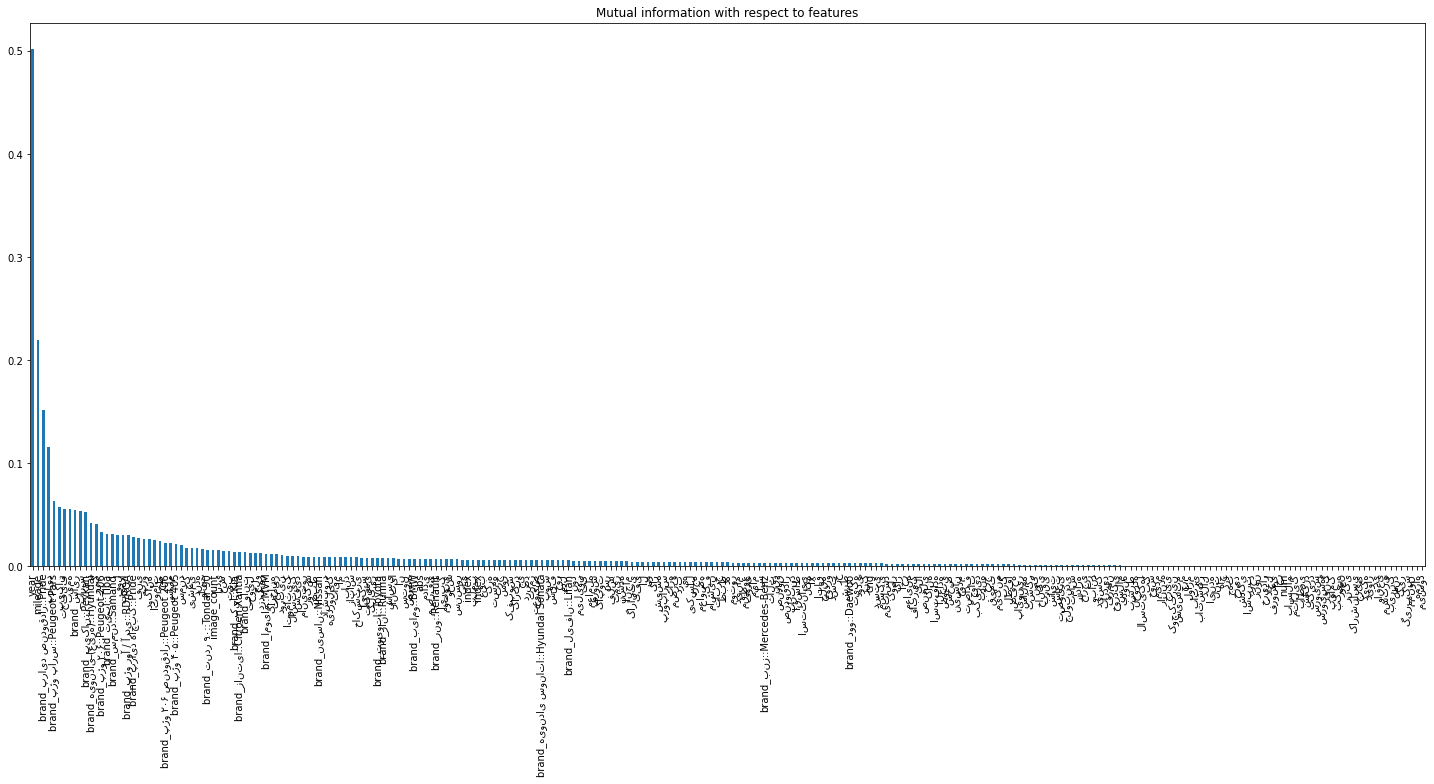

In [29]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (25,10))
plt.show()

<h2 style = "font-size: 15px; color: #235;"> We will select 10 percentile of the features<br/> </h2>


In [265]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(data,Price)
data.columns[sel.get_support()]
X_train_mi = sel.transform(data)

<h2 style = "font-size: 25px; color: #235;text-align: center  ;"> Question 4<br/> </h2>
<h2 style = "font-size: 20px; color: #235"> Handle Missing Values :</h2>
<h2 style = "font-size: 15px; color: #235"> 1 . Delete Rows with Missing Values:<br/>
If columns have more than half of rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.<br/></h2>
<h2 style = "font-size: 15px; color: #235"> 2 . Impute missing values with Mean/Median::<br/>
This method can prevent the loss of data compared to the earlier method. Replacing (mean, median) is a statistical approach to handle the missing values and Works well with a small dataset and easy to implement but works only with numerical continuous variables and may cause data leakage and also does not factor the covariance between features.
<br/></h2>


<h1 style = "font-size: 50px;text-align: center; ">Phase 2 <h1/>

<h2 style = "font-size: 25px; color: #235;text-align: center  ;"> Question 5<br/> </h2>
<h2 style = "font-size: 15px; color: #235"> A larger test set size shows the potential of the model in the real world. However, too few training samples can also cause the model to be underfitting. In my point of view, if your dataset size is large, the 80/20 ratio seems appropriate. Conversely, if your data set size is small, this ratio should be 70/30.Hence  , I use 80/20 ratio .<br/>
    <h2/>

In [165]:
x_train, x_test, y_train, y_test = train_test_split(data, Price, test_size=0.2)

<h1 style = "font-size: 25px;color: #235 ">KNN </h1>
<h1 style = "font-size: 15px;color: #235 ">The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data<br/>Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.<br/>

n_neighbors (default=5):<br/>
Number of neighbors to use by default for kneighbors queries.</h1>

In [132]:
x_red = x_train.head(50000)
y_red = y_train.head(50000)

In [133]:
x_test_red = x_test.head(5000)
y_test_red = y_test.head(5000)

In [144]:
knnacc = []
knnacctrain = []
knnprec = []
knnrec = []
Err = []
neighbors = np.arange(8,12) 
for n in neighbors :
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_red, y_red)
    y_t = neigh.predict(x_red)
    Error_t = mean_squared_error(y_red,y_t)
    rmse_t = math.sqrt(Error_t)
    y_p = neigh.predict(x_test_red)
    Error = mean_squared_error(y_test_red,y_p)
    rmse = math.sqrt(Error)
    Err.append([rmse_t,rmse])
    knnacctrain.append(metrics.accuracy_score(y_red, y_t))
    knnacc.append(metrics.accuracy_score(y_test_red, y_p))
    knnprec.append(metrics.precision_score(y_test_red, y_p,average='weighted'))
    knnrec.append(metrics.recall_score(y_test_red, y_p,average='weighted'))

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is 

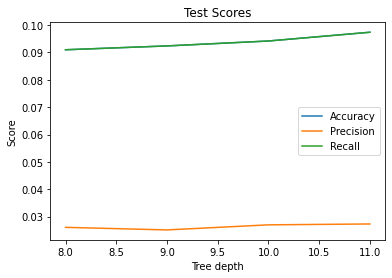

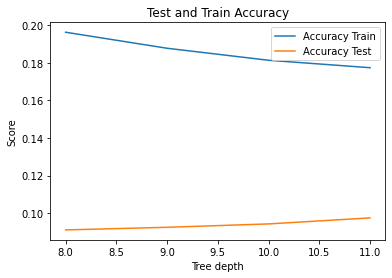

Accuracy: 0.09521832973601195
Precision: 0.0240649977673048
Recall: 0.09521832973601195
F1: 0.03458999610897287


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
plt.plot(neighbors, knnacc, label="Accuracy")
plt.plot(neighbors, knnprec, label="Precision")
plt.plot(neighbors, knnrec, label="Recall")
plt.legend(["Accuracy", "Precision", "Recall"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test Scores')
plt.show()

plt.plot(neighbors, knnacctrain, label="Accuracy Train")
plt.plot(neighbors, knnacc, label="Accuracy Test")
plt.legend(["Accuracy Train", "Accuracy Test"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test and Train Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors=neighbors[knnacc.index(max(knnacc))])
knn.fit(x_train, y_train)
knny_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, knny_pred))
print("Precision:",metrics.precision_score(y_test, knny_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, knny_pred,average='weighted'))
print("F1:",metrics.f1_score(y_test, knny_pred,average='weighted'))

In [256]:
score = neigh.score(x_test, y_test)
score

0.10949692844097626

<h1 style = "font-size: 25px; color: #235">Decision Tree</h1>
<h1 style = "font-size: 15px; color: #235">
The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.<br/>
    
In the following,I will explain the hyperparameters of this algorithm:<br/>
max_depth :<br/>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.<br/>
min_samples_split : <br/>
The minimum number of samples required to split an internal node:<br/>

If int, then consider min_samples_split as the minimum number.<br/>

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.<br/>
    
</h1> 


In [139]:
max_depths = np.linspace(7, 11, 4, endpoint=True)
dtacc = []
dtacctrain = []
dtprec = []
dtrec = []
for depth in max_depths:
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    train_pred = dt.predict(x_train)
    dtacctrain.append(metrics.accuracy_score(y_train, train_pred))
    dtacc.append(metrics.accuracy_score(y_test, y_pred))
    dtprec.append(metrics.precision_score(y_test, y_pred,average='weighted'))
    dtrec.append(metrics.recall_score(y_test, y_pred,average='weighted'))

In [154]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depths[dtacc.index(max(dtacc))])
dt = dt.fit(x_train,y_train)
dty_pred = dt.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, dty_pred))
print("Precision:",metrics.precision_score(y_test, dty_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, dty_pred,average='weighted'))
print("F1:",metrics.f1_score(y_test, dty_pred,average='weighted'))

Accuracy: 0.1408766395483978
Precision: 0.06458287738392408
Recall: 0.1408766395483978
F1: 0.06159828992854343


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


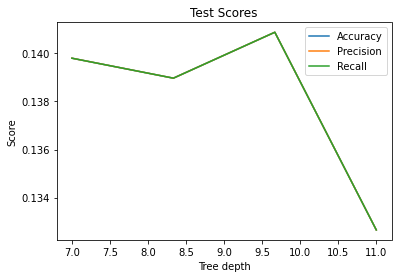

In [155]:
plt.plot(max_depths, dtacc, label="Accuracy")
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test Scores')
plt.show()

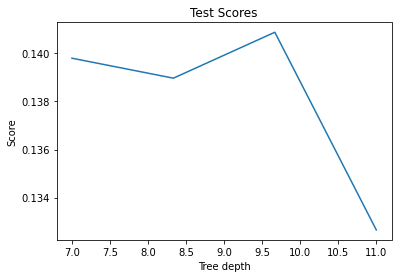

In [157]:
plt.plot(max_depths, dtprec, label="Precision")
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test Scores')
plt.show()

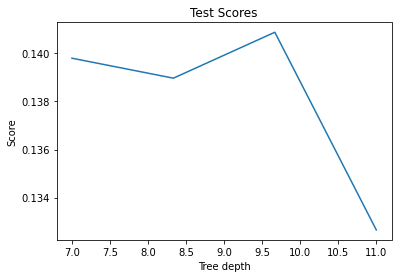

In [158]:
plt.plot(max_depths, dtrec, label="Recall")
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test Scores')
plt.show()

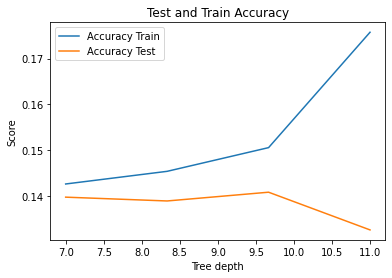

In [156]:
plt.plot(max_depths, dtacctrain, label="Accuracy Train")
plt.plot(max_depths, dtacc, label="Accuracy Test")
plt.legend(["Accuracy Train", "Accuracy Test"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test and Train Accuracy')
plt.show()

<h2 style = "font-size: 25px; color: #235;text-align: center  ;"> Question 6<br/> </h2>
<h1 style = "font-size: 15px; color: #235">As you see ,the depth of the tree in the range of 9.5 to 10 is the most accurate.<br/>
As you can see in 'test and train Accuracy' plot , as the depth of the tree increases, the amount of Accuracy of the training data increases and the amount of Accuracy of the test data decreases.
This phenomenon is called overfitting.<h2/>

<h1 style = "font-size: 25px; color: #235">Linear Regression</h1>

In [189]:
ratio_list = np.linspace(0.02, 0.8, 20)

In [192]:
RMSE_train =[]
RMSE_test =[]
for ratio in ratio_list :
    x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(data, Price, test_size=ratio)
    reg = LinearRegression()
    reg.fit(x_train_reg, y_train_reg)
    y_predict_train_reg = reg.predict(x_train_reg)
    y_predict_reg = reg.predict(x_test_reg)
    Error_reg = mean_squared_error(y_test_reg,y_predict_reg)
    Error_train_reg = mean_squared_error(y_train_reg,y_predict_train_reg)
    rmse_reg = math.sqrt(Error_reg)
    rmse_train_reg = math.sqrt(Error_train_reg)
    RMSE_test.append(rmse_reg)
    RMSE_train.append(rmse_train_reg)

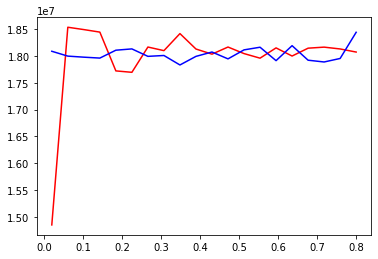

In [193]:
plt.plot(ratio_list,RMSE_test,'r-',ratio_list,RMSE_train,'b-')

<h1 style = "font-size: 15px; color: #235">As you see above , the lower the ratio of test data to train data, the lower the rmse of test data but the much higher the rmse of the train data and the higher the ratio, the closer the two errors get.</h1>

<h1 style = "font-size: 50px;text-align: center; ">Phase 3 <h1/>
<h1 style = "font-size: 25px;text-align: center; color: #235"> Ensemble methods<h1/>
<h1 style = "font-size: 15px; color: #235">Random Forest are an awesome kind of Machine Learning models. They solve many of the problems of individual Decision trees, and are always a candidate to be the most accurate one of the models tried when building a certain application.
<br/>
    The most important hyper-parameters of a Random Forest that can be tuned are:<br/>
    The Nº of Decision Trees in the forest <br/>
    The criteria with which to split on each node<br/>
    The Maximum Depth of the Individual Trees<br/>
    The minimum samples to split on at an internal node <br/>
    Maximum number of leaf nodes<br/>
    Number of random features <br/>
    The size of the bootstrapped dataset<br/>
    
 I will examine two of these hyperparameters in detail : <h1/>   
 <h1 style = "font-size: 20px;text-align: center; color: #235">Nº of Trees in the forest <h1/>
 <h1 style = "font-size: 15px; color: #235">By building forests with a large number of trees (high number of estimators) we can create a more robust aggregate model with less variance, at the cost of a greater training time. Most times the secret here is to evaluate your data: how much data is available, and how many features does each observation have.
Because of the randomness of Random Forest, if you have a lot of features and a small number of trees some features with high predictive power could get left out of the forest and not be used whatsoever, or be used very little.
The same applies for the data: if you have a lot of observations and you are not using the whole dataset to train each tree, if you have a small number of trees, then some observations could be left out.
As Random Forests rarely overfit, in practice you can use a large number of trees to avoid these problems, and get good results following the guideline that when all other hyper-parameters are fixed, increasing the number of trees generally reduces model error at the cost of a higher training time.

<h1/>   
    
 
 <h1 style = "font-size: 20px;text-align: center; color: #235">The Maximum Depth of the Individual Trees<h1/>
 <h1 style = "font-size: 15px; color: #235">Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account.
In an individual tree this causes overfitting, however in Random Forest, because of the way the ensemble is built, it is harder to overfit, although it is still possible for large depth values.
This parameter should be set to a reasonable amount depending on the number of features of your tree: don’t build stumps (really shallow trees) nor insanely big trees; set this parameter to a reasonable amount and tune it a little bit if you want, but changes around a reasonable value do not impact the performance of your forest greatly, so you don’t have to include it in a procedure like Grid Search if you don’t want.
<h1/>
<h1 style = "font-size: 20px;text-align: center; color: #235">The Number of random features to consider at each split<h1/>
 <h1 style = "font-size: 15px; color: #235">This is one of the most important hyperparameters to tune in your Random Forest ensemble, so play close attention.<br/>
The best value of this hyperparameter is hard to pick without experimentation, so the best way to obtain it is using a Grid Search with Cross Validation, taking into account the following:<br/>
A small value (less features considered when splitting at each node) will reduce the variance of the ensemble, at the cost of higher individual tree (and probably aggregate) bias.<br/>
This value should be set accordingly to how many informative or quality features you have, by taking into account noisy features that have many outliers. If your data set has very clean, polished, and quality features, then the value of the number of random features on each split on can be relatively small: all the considered features will be cool. If you have a lot of noisy data, then this value should probably be higher, to increase the chances of a quality feature being included in the contest.<br/>
Increasing the maximum number of random features considered in a split tends to decrease the bias of the model, as there is a better chance that good features will be included, however this can come at the cost of increased variance. Also, there is a decrease in training speed when we include more features to test at each node.<br/>
The most practical approach here is to cross-validate your posible options and keep the model that yields the best results, taking into account the previous considerations. You can try setting the the following values in the grid search space for the RandomForestClassifier of Scikit-learn.<br/>
None : This will consider all the features of your data, taking some of the randomness out of random forests, and possibly increasing variance.<br/>
sqrt : This option will take square root of the total number of features in individual each split. If we have 25 features in our data, then it will pick 5 random features at each node. This option is generally good for classification problems.<br/>
0.2 (decimal value between 0 and 1): This option allows the random forest to take a % of variables in individual split. In this example we would be picking 20% of the features, which is a reasonable amount to consider if we have many features. Try 0.3, 0.4, and 0.5, and maybe even higher values if you have very noisy data. For regression problems 0.33% is a good starting point to search around.<br/>

<h1/>

In [194]:
max_depths = np.linspace(8, 12, 4)
rfacc = []
rfacctrain = []
rfprec = []
rfrec = []
for depth in max_depths:
    rf = RandomForestClassifier(criterion="entropy", max_depth=depth, max_samples=0.5, max_features=0.5, random_state=0)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    train_pred = rf.predict(x_train)
    rfacctrain.append(metrics.accuracy_score(y_train, train_pred))
    rfacc.append(metrics.accuracy_score(y_test, y_pred))
    rfprec.append(metrics.precision_score(y_test, y_pred,average='weighted'))
    rfrec.append(metrics.recall_score(y_test, y_pred,average='weighted'))


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Pr

In [195]:
rfrec

[0.13930513469760492,
 0.13930513469760492,
 0.1400107924121041,
 0.13951268108422232]

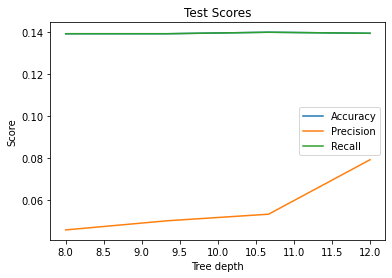

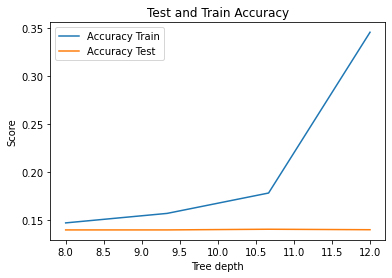

In [196]:
plt.plot(max_depths, rfacc, label="Accuracy")
plt.plot(max_depths, rfprec, label="Precision")
plt.plot(max_depths, rfrec, label="Recall")
plt.legend(["Accuracy", "Precision", "Recall"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test Scores')
plt.show()

plt.plot(max_depths, rfacctrain, label="Accuracy Train")
plt.plot(max_depths, rfacc, label="Accuracy Test")
plt.legend(["Accuracy Train", "Accuracy Test"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test and Train Accuracy')
plt.show()

In [197]:
Error_test = mean_squared_error(y_test,y_pred)
rmse_test = math.sqrt(Error_test)
rmse_test

32071691.28386721

In [ ]:
rf=RandomForestClassifier(criterion="entropy",max_depth=max_depths[rfacc.index(max(rfacc))],max_samples=0.5,max_features=0.5,random_state=0)
# dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depths[dtacc.index(max(dtacc))])
rf = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
d = max_depths[rfacc.index(max(rfacc))]
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
print("F1:",metrics.f1_score(y_test, y_pred,average='weighted'))

In [ ]:
samples = np.arange(0.1, 1.0, 0.1)
rfacc = []
rfacctrain = []
rfprec = []
rfrec = []
for s in samples:
    rf = RandomForestClassifier(criterion="entropy", max_depth=d, max_samples=s, max_features=0.5, random_state=0)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    train_pred = rf.predict(x_train)
    rfacctrain.append(metrics.accuracy_score(y_train, train_pred))
    rfacc.append(metrics.accuracy_score(y_test, y_pred))
    rfprec.append(metrics.precision_score(y_test, y_pred))
    rfrec.append(metrics.recall_score(y_test, y_pred))


In [ ]:
plt.plot(samples, rfacc, label="Accuracy")
plt.plot(samples, rfprec, label="Precision")
plt.plot(samples, rfrec, label="Recall")
plt.legend(["Accuracy", "Precision", "Recall"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test Scores')
plt.show()

plt.plot(samples, rfacctrain, label="Accuracy Train")
plt.plot(samples, rfacc, label="Accuracy Test")
plt.legend(["Accuracy Train", "Accuracy Test"])
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Test and Train Accuracy')
plt.show()
rf=RandomForestClassifier(criterion="entropy",max_depth=d,max_samples=samples[rfacc.index(max(rfacc))],max_features=0.5,random_state=0)
# dt = DecisionTreeClassifier(criterion="entropy", max_depth=max_depths[dtacc.index(max(dtacc))])
rf = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
print("F1:",metrics.f1_score(y_test, y_pred,average='weighted'))

<h2 style = "font-size: 25px; color: #235;text-align: center  ;"> Question 7<br/> </h2>
<h2 style = "font-size: 15px; color: #235;"> bias:<br/>
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.<br/> </h2>
<h2 style = "font-size: 15px; color: #235;"> variance:<br/>
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.<br/> </h2>
<h2 style = "font-size: 15px; color: #235;"> 
underfitting happens when a model unable to capture the underlying pattern of the data. These models usually have high bias and low variance. It happens when we have very less amount of data to build an accurate model or when we try to build a linear model with a nonlinear data. Also, these kind of models are very simple to capture the complex patterns in data like Linear and logistic regression.
<br/> </h2>
<h2 style = "font-size: 15px; color: #235;"> 
 overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance. These models are very complex like Decision trees which are prone to overfitting.
<br/> To build a good model, we need to find a good balance between bias and variance such that it minimizes the total error.<br/>An optimal balance of bias and variance would never overfit or underfit the model.
Therefore understanding bias and variance is critical for understanding the behavior of prediction models.
    <br/><br/><br/> Random Forest combines trees and works as an ensemble model. Here, n different trees are formed using sampling technique with replacement where the samples are drawn from main data set and these n trees work in parallel to give you the prediction. The prediction from each tree is taken and the output of Random Forest is the average of n trees prediction.

Random forest helps in reducing the variance by averaging out several trees prediction which in turn reduces overfitting.<br/>
   Decision trees are much easier to interpret and understand. Since a random forest combines multiple decision trees, it becomes more difficult to interpret. Infact, it’s not impossible to interpret a random forest. 


Also, Random Forest has a higher training time than a single decision tree. we should take this into consideration because as we increase the number of trees in a random forest, the time taken to train each of them also increases. 
    <br/>
I think , despite instability and dependency on a particular set of features, decision trees are really helpful because they are easier to interpret and faster to train. Anyone with very little knowledge of data science can also use decision trees to make quick data-driven decisions.


<h2/>